<a href="https://colab.research.google.com/github/ALWINAZIH/ALWINAZIH/blob/main/YOLOV12VSV11VSRT_DETR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🎯 INDIVIDUAL METRICS COMPARISON TOOL
Create separate plots for each metric:
📊 mAP@0.5, mAP@0.5:0.95, F1-Score, Accuracy, Precision, Box Loss
🎨 Each metric gets its own dedicated plot
📁 UPLOAD CSV FILES FOR COMPARISON
Please upload exactly 3 CSV files:
1️⃣ YOLOv12 results.csv
2️⃣ YOLOv11 results.csv
3️⃣ RT-DETR results.csv


Saving RT-DETR results .csv to RT-DETR results .csv
Saving YOLOv11 results .csv to YOLOv11 results .csv
Saving YOLOv12 results .csv to YOLOv12 results  (1).csv
✅ Loaded RT-DETR: RT-DETR results .csv
   📊 Epochs: 157 | Columns: 15
✅ Loaded YOLOv11: YOLOv11 results .csv
   📊 Epochs: 170 | Columns: 15
✅ Loaded YOLOv12: YOLOv12 results  (1).csv
   📊 Epochs: 170 | Columns: 15

📊 Successfully loaded 3 models

📋 AVAILABLE METRICS IN UPLOADED FILES:

🔸 RT-DETR:
   📁 File: RT-DETR results .csv
   📊 Columns (15):
      📈 Metrics: metrics/precision(B), metrics/recall(B), metrics/mAP50(B), metrics/mAP50-95(B)
      📉 Losses: train/giou_loss, train/cls_loss, train/l1_loss, val/giou_loss, val/cls_loss, val/l1_loss
      📊 Other: epoch, time, lr/pg0, lr/pg1, lr/pg2

🔸 YOLOv11:
   📁 File: YOLOv11 results .csv
   📊 Columns (15):
      📈 Metrics: metrics/precision(B), metrics/recall(B), metrics/mAP50(B), metrics/mAP50-95(B)
      📉 Losses: train/box_loss, train/cls_loss, train/dfl_loss, val/box_loss, va

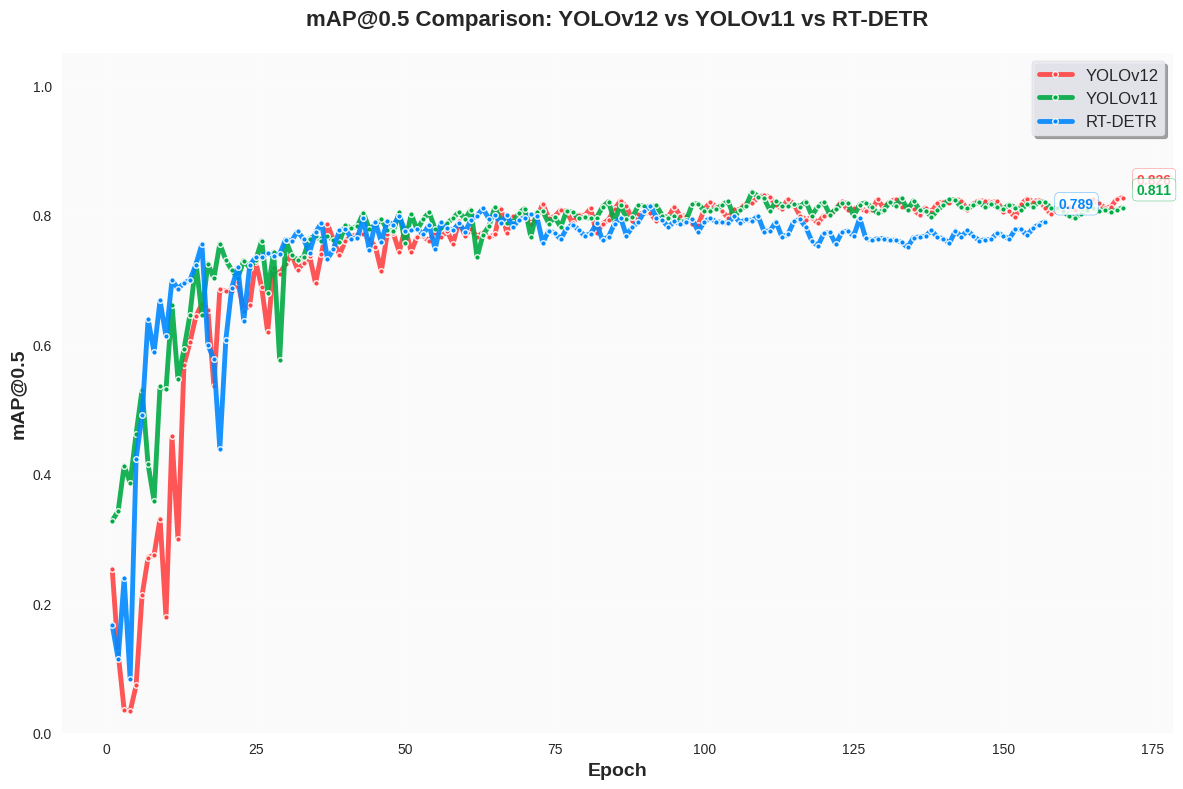


📈 MAP@0.5 SUMMARY:
YOLOv12    | Final: 0.8264 | Best: 0.8305 (Epoch 110)
YOLOv11    | Final: 0.8108 | Best: 0.8356 (Epoch 108)
RT-DETR    | Final: 0.7891 | Best: 0.8141 (Epoch 91)

2️⃣ Creating mAP@0.5:0.95 plot...
📊 mAP@0.5:0.95 plot saved to: individual_metrics_plots/map_0.5_0.95_comparison.png


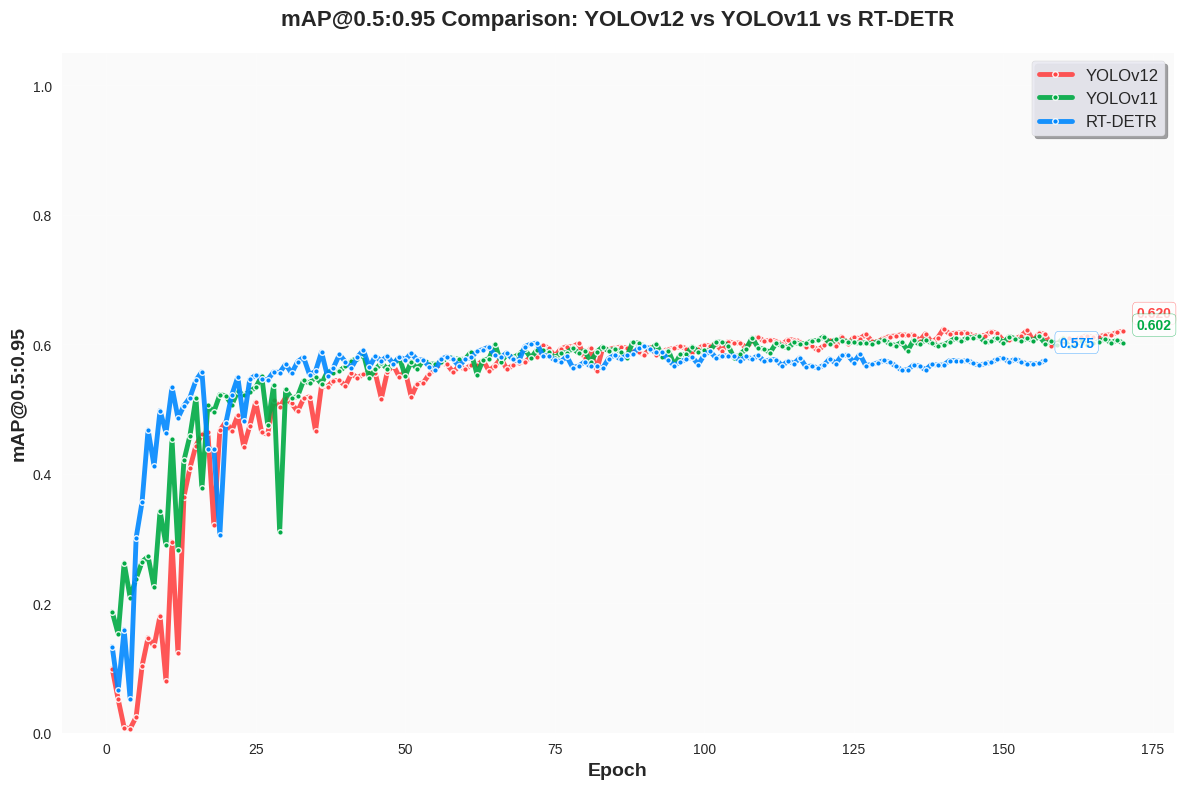


📈 MAP@0.5:0.95 SUMMARY:
YOLOv12    | Final: 0.6200 | Best: 0.6234 (Epoch 140)
YOLOv11    | Final: 0.6019 | Best: 0.6128 (Epoch 156)
RT-DETR    | Final: 0.5749 | Best: 0.6017 (Epoch 72)

3️⃣ Creating F1-Score plot...
📊 F1-Score plot saved to: individual_metrics_plots/f1_score_comparison.png


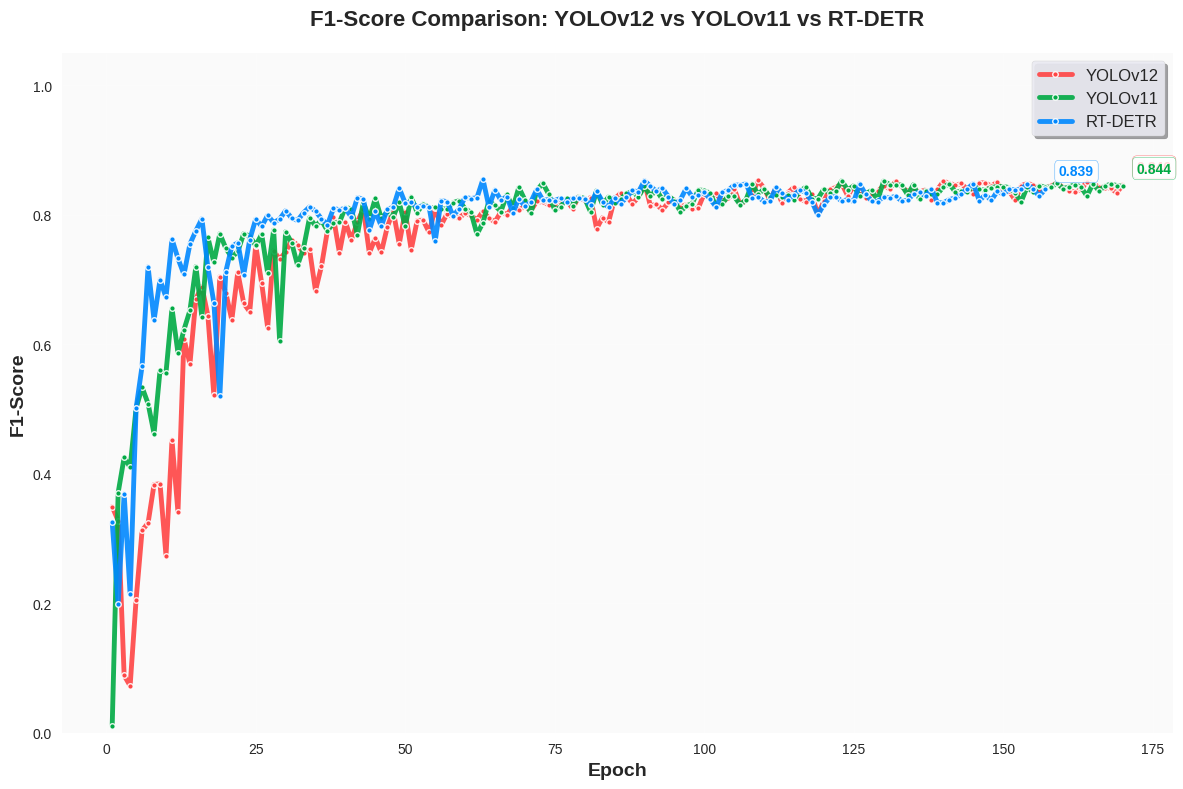


📈 F1-SCORE SUMMARY:
YOLOv12    | Final: 0.8460 | Best: 0.8529 (Epoch 109)
YOLOv11    | Final: 0.8436 | Best: 0.8524 (Epoch 123)
RT-DETR    | Final: 0.8390 | Best: 0.8546 (Epoch 63)

4️⃣ Creating Accuracy plot...
📊 Accuracy plot saved to: individual_metrics_plots/accuracy_comparison.png


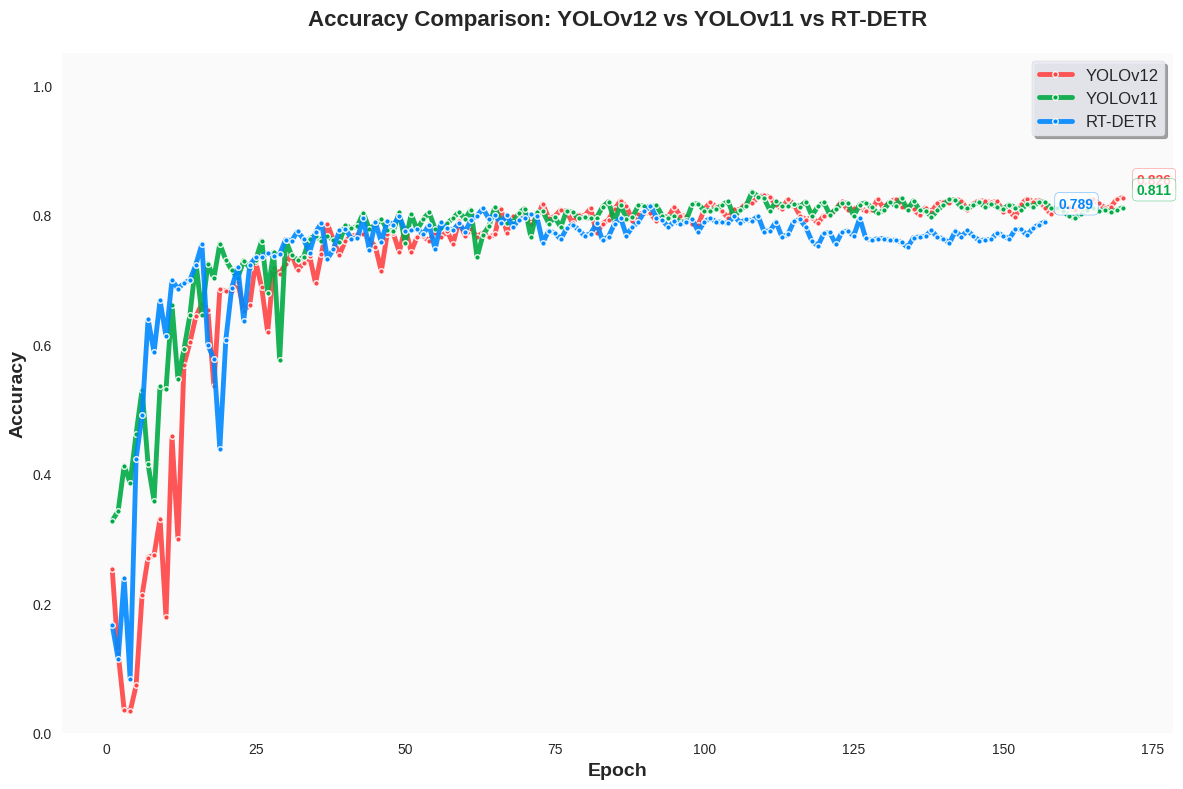


📈 ACCURACY SUMMARY:
YOLOv12    | Final: 0.8264 | Best: 0.8305 (Epoch 110)
YOLOv11    | Final: 0.8108 | Best: 0.8356 (Epoch 108)
RT-DETR    | Final: 0.7891 | Best: 0.8141 (Epoch 91)

5️⃣ Creating Precision plot...
📊 Precision plot saved to: individual_metrics_plots/precision_comparison.png


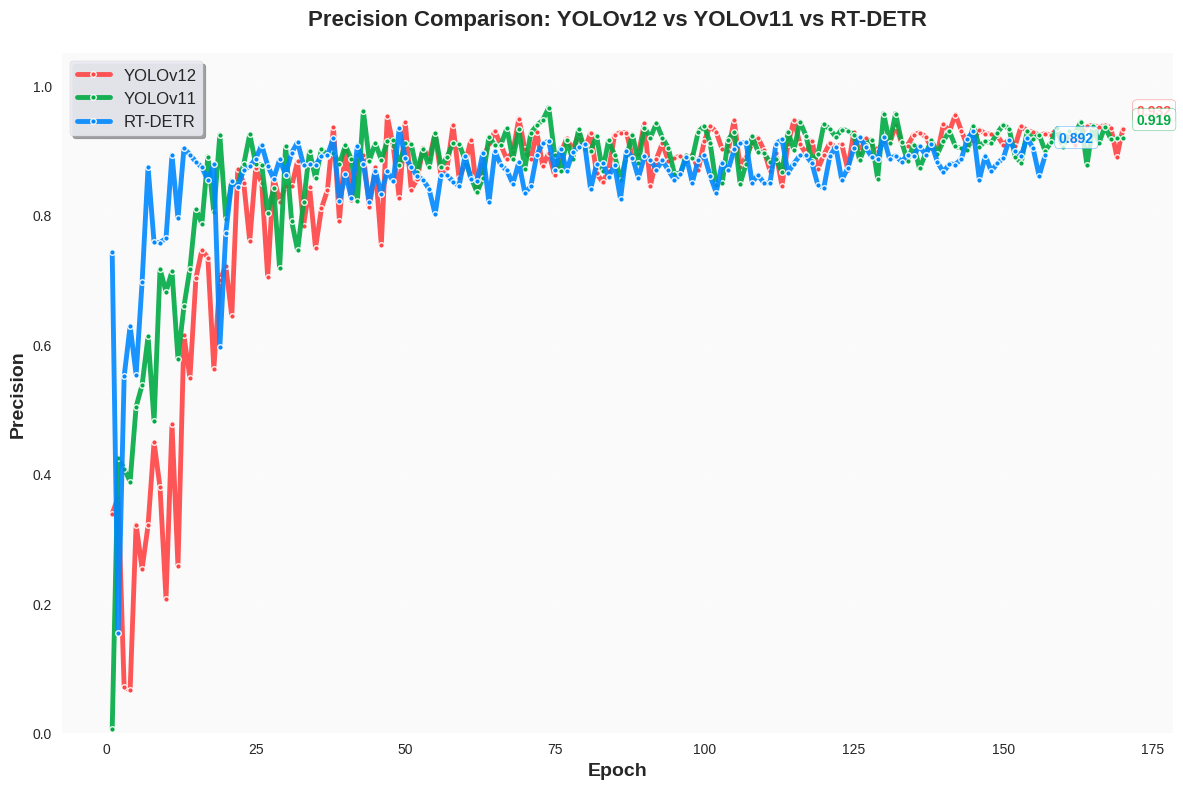


📈 PRECISION SUMMARY:
YOLOv12    | Final: 0.9324 | Best: 0.9547 (Epoch 142)
YOLOv11    | Final: 0.9191 | Best: 0.9654 (Epoch 74)
RT-DETR    | Final: 0.8915 | Best: 0.9333 (Epoch 49)

6️⃣ Creating Box Loss plot...
📊 Box Loss plot saved to: individual_metrics_plots/box loss_comparison.png


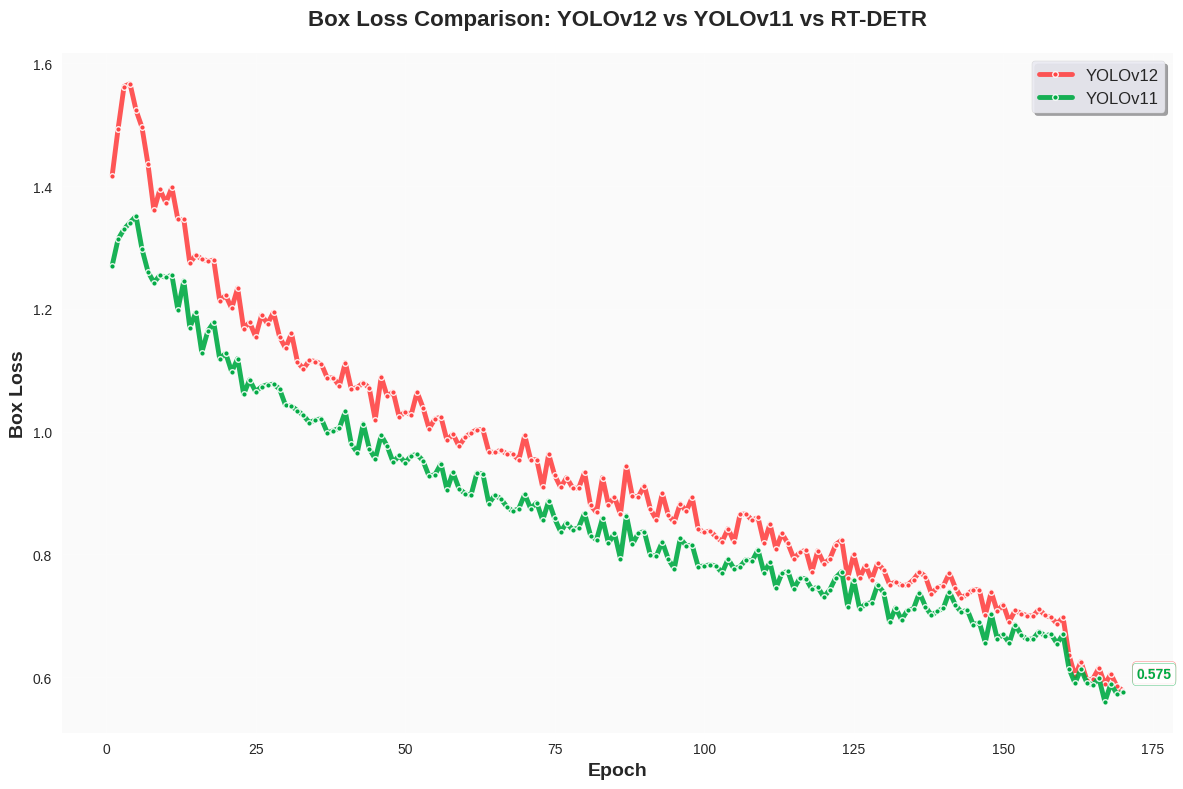


📈 BOX LOSS SUMMARY:
YOLOv12    | Final: 0.5780 | Best: 1.5668 (Epoch 4)
YOLOv11    | Final: 0.5752 | Best: 1.3511 (Epoch 5)

✅ All individual plots created!
📁 Plots saved to: individual_metrics_plots

🎉 INDIVIDUAL METRICS COMPARISON COMPLETE!
📊 Generated 6 separate plots:
   1️⃣ mAP@0.5 Comparison
   2️⃣ mAP@0.5:0.95 Comparison
   3️⃣ F1-Score Comparison
   4️⃣ Accuracy Comparison
   5️⃣ Precision Comparison
   6️⃣ Box Loss Comparison

🎮 MANUAL COMMANDS (optional):
# Create specific metric plots:
create_single_metric_plot(tool, 'map50')      # mAP@0.5 only
create_single_metric_plot(tool, 'f1')         # F1-Score only
create_single_metric_plot(tool, 'precision')  # Precision only
create_single_metric_plot(tool, 'loss')       # Box Loss only

# Recreate all plots:
tool.create_all_individual_plots('custom_folder')


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files
import os
import warnings
warnings.filterwarnings('ignore')

# Set style for publication-quality plots
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")

class IndividualMetricsComparison:
    def __init__(self):
        """Initialize the comparison tool for individual metrics"""
        self.models_data = {}
        self.colors = {
            'YOLOv12': '#FF4444',  # Red
            'YOLOv11': '#00AA44',  # Green
            'RT-DETR': '#0088FF'   # Blue
        }

        # Define metric mappings for different CSV formats
        self.metric_mappings = {
            'mAP50': ['metrics/mAP50(B)', 'mAP50', 'mAP_0.5', 'map50'],
            'mAP50-95': ['metrics/mAP50-95(B)', 'mAP50-95', 'mAP_0.5:0.95', 'map50_95'],
            'precision': ['metrics/precision(B)', 'precision', 'P', 'prec'],
            'recall': ['metrics/recall(B)', 'recall', 'R', 'rec'],
            'accuracy': ['accuracy', 'acc', 'Accuracy'],
            'f1_score': ['f1_score', 'f1', 'F1', 'f1-score'],
            'box_loss': ['train/box_loss', 'val/box_loss', 'box_loss', 'loss_box', 'BoxLoss'],
            'epoch': ['epoch', 'Epoch']
        }

    def upload_csv_files(self):
        """Upload CSV files for the three models"""
        print("📁 UPLOAD CSV FILES FOR COMPARISON")
        print("="*60)
        print("Please upload exactly 3 CSV files:")
        print("1️⃣ YOLOv12 results.csv")
        print("2️⃣ YOLOv11 results.csv")
        print("3️⃣ RT-DETR results.csv")
        print("="*60)

        uploaded = files.upload()

        for filename, content in uploaded.items():
            # Save uploaded file
            with open(filename, 'wb') as f:
                f.write(content)

            # Determine model type from filename
            model_name = self.determine_model_name(filename)

            try:
                df = pd.read_csv(filename)
                self.models_data[model_name] = {
                    'dataframe': df,
                    'filename': filename
                }
                print(f"✅ Loaded {model_name}: {filename}")
                print(f"   📊 Epochs: {len(df)} | Columns: {len(df.columns)}")

            except Exception as e:
                print(f"❌ Error loading {filename}: {e}")

        # Verify we have the required models
        required_models = ['YOLOv12', 'YOLOv11', 'RT-DETR']
        missing_models = [model for model in required_models if model not in self.models_data]

        if missing_models:
            print(f"\n⚠️ Missing models: {missing_models}")
            print("💡 Please rename your files to include the model name or upload again")

        print(f"\n📊 Successfully loaded {len(self.models_data)} models")
        return len(self.models_data) == 3

    def determine_model_name(self, filename):
        """Determine model name from filename"""
        filename_lower = filename.lower()

        if 'yolov12' in filename_lower or 'yolo12' in filename_lower:
            return 'YOLOv12'
        elif 'yolov11' in filename_lower or 'yolo11' in filename_lower:
            return 'YOLOv11'
        elif 'rt-detr' in filename_lower or 'rtdetr' in filename_lower or 'detr' in filename_lower:
            return 'RT-DETR'
        else:
            print(f"\n🤔 Could not auto-detect model for: {filename}")
            print("Available options: YOLOv12, YOLOv11, RT-DETR")
            model_name = input("Please enter model name: ").strip()
            return model_name if model_name in ['YOLOv12', 'YOLOv11', 'RT-DETR'] else 'Unknown'

    def find_metric_column(self, df, metric_key):
        """Find the correct column name for a metric"""
        possible_names = self.metric_mappings.get(metric_key, [metric_key])

        # Direct match
        for name in possible_names:
            if name in df.columns:
                return name

        # Case-insensitive match
        for col in df.columns:
            for name in possible_names:
                if col.lower() == name.lower():
                    return col

        # Partial match
        for col in df.columns:
            for name in possible_names:
                if name.lower() in col.lower() or col.lower() in name.lower():
                    return col

        return None

    def calculate_f1_score(self, df):
        """Calculate F1 score if not available"""
        precision_col = self.find_metric_column(df, 'precision')
        recall_col = self.find_metric_column(df, 'recall')

        if precision_col and recall_col:
            precision = df[precision_col]
            recall = df[recall_col]
            f1 = 2 * (precision * recall) / (precision + recall)
            f1 = f1.fillna(0)  # Handle division by zero
            return f1
        return None

    def calculate_accuracy(self, df):
        """Calculate accuracy if not available (using mAP50 as proxy)"""
        map50_col = self.find_metric_column(df, 'mAP50')
        if map50_col:
            return df[map50_col]  # Use mAP50 as accuracy proxy
        return None

    def create_individual_metric_plot(self, metric_key, metric_title, save_path=None):
        """Create individual plot for a specific metric"""

        plt.figure(figsize=(12, 8))

        max_epochs = 0
        legends_added = []

        for model_name in ['YOLOv12', 'YOLOv11', 'RT-DETR']:
            if model_name not in self.models_data:
                continue

            df = self.models_data[model_name]['dataframe']

            # Find epoch column
            epoch_col = self.find_metric_column(df, 'epoch')
            if not epoch_col:
                epoch_col = df.index + 1  # Use index if no epoch column
            else:
                epoch_col = df[epoch_col]

            # Find metric column
            metric_col = self.find_metric_column(df, metric_key)

            # Special handling for calculated metrics
            if metric_col is None:
                if metric_key == 'f1_score':
                    metric_data = self.calculate_f1_score(df)
                elif metric_key == 'accuracy':
                    metric_data = self.calculate_accuracy(df)
                else:
                    continue
            else:
                metric_data = df[metric_col]

            if metric_data is not None:
                color = self.colors[model_name]

                # Plot with enhanced styling
                plt.plot(epoch_col, metric_data,
                        label=model_name,
                        color=color,
                        linewidth=3.5,
                        marker='o',
                        markersize=4,
                        markerfacecolor=color,
                        markeredgecolor='white',
                        markeredgewidth=1,
                        alpha=0.9)

                legends_added.append(model_name)
                max_epochs = max(max_epochs, len(metric_data))

                # Add final value annotation
                final_value = metric_data.iloc[-1] if hasattr(metric_data, 'iloc') else metric_data[-1]
                final_epoch = epoch_col.iloc[-1] if hasattr(epoch_col, 'iloc') else epoch_col[-1]

                plt.annotate(f'{final_value:.3f}',
                           xy=(final_epoch, final_value),
                           xytext=(10, 10),
                           textcoords='offset points',
                           fontsize=10,
                           fontweight='bold',
                           color=color,
                           bbox=dict(boxstyle='round,pad=0.3',
                                   facecolor='white',
                                   edgecolor=color,
                                   alpha=0.8))

        # Customize plot
        plt.title(f'{metric_title} Comparison: YOLOv12 vs YOLOv11 vs RT-DETR',
                 fontsize=16, fontweight='bold', pad=20)
        plt.xlabel('Epoch', fontsize=14, fontweight='bold')
        plt.ylabel(metric_title, fontsize=14, fontweight='bold')

        # Enhanced grid
        plt.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
        plt.grid(True, alpha=0.1, linestyle='-', linewidth=1, which='minor')

        # Legend with better positioning
        if legends_added:
            plt.legend(loc='best', fontsize=12, frameon=True,
                     fancybox=True, shadow=True, framealpha=0.9)

        # Set appropriate y-axis limits
        if metric_key not in ['box_loss']:
            plt.ylim(0, 1.05)

        # Add subtle background color
        plt.gca().set_facecolor('#fafafa')

        # Improve layout
        plt.tight_layout()

        # Save if path provided
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight',
                       facecolor='white', edgecolor='none')
            print(f"📊 {metric_title} plot saved to: {save_path}")

        plt.show()

        # Print metric summary
        print(f"\n📈 {metric_title.upper()} SUMMARY:")
        print("="*50)
        for model_name in legends_added:
            df = self.models_data[model_name]['dataframe']
            metric_col = self.find_metric_column(df, metric_key)

            if metric_col:
                data = df[metric_col]
            elif metric_key == 'f1_score':
                data = self.calculate_f1_score(df)
            elif metric_key == 'accuracy':
                data = self.calculate_accuracy(df)
            else:
                continue

            if data is not None:
                final_val = data.iloc[-1] if hasattr(data, 'iloc') else data[-1]
                max_val = data.max() if hasattr(data, 'max') else max(data)
                max_epoch = data.idxmax() + 1 if hasattr(data, 'idxmax') else np.argmax(data) + 1

                print(f"{model_name:10} | Final: {final_val:.4f} | Best: {max_val:.4f} (Epoch {max_epoch})")

    def create_all_individual_plots(self, save_dir=None):
        """Create all individual metric plots"""

        if not self.models_data:
            print("❌ No model data loaded. Please upload CSV files first.")
            return

        # Create save directory
        if save_dir:
            os.makedirs(save_dir, exist_ok=True)

        print("🎨 CREATING INDIVIDUAL METRIC PLOTS")
        print("="*60)

        # Define metrics to plot
        metrics = [
            ('mAP50', 'mAP@0.5'),
            ('mAP50-95', 'mAP@0.5:0.95'),
            ('f1_score', 'F1-Score'),
            ('accuracy', 'Accuracy'),
            ('precision', 'Precision'),
            ('box_loss', 'Box Loss')
        ]

        for i, (metric_key, metric_title) in enumerate(metrics, 1):
            print(f"\n{i}️⃣ Creating {metric_title} plot...")

            save_path = None
            if save_dir:
                safe_title = metric_title.replace('@', '_').replace(':', '_').replace('-', '_')
                save_path = f"{save_dir}/{safe_title.lower()}_comparison.png"

            self.create_individual_metric_plot(metric_key, metric_title, save_path)

        print(f"\n✅ All individual plots created!")
        if save_dir:
            print(f"📁 Plots saved to: {save_dir}")

    def print_available_metrics(self):
        """Print available metrics in uploaded files"""
        print("\n📋 AVAILABLE METRICS IN UPLOADED FILES:")
        print("="*60)

        for model_name, model_info in self.models_data.items():
            df = model_info['dataframe']
            print(f"\n🔸 {model_name}:")
            print(f"   📁 File: {model_info['filename']}")
            print(f"   📊 Columns ({len(df.columns)}):")

            # Group columns by type
            metric_cols = []
            loss_cols = []
            other_cols = []

            for col in df.columns:
                if any(keyword in col.lower() for keyword in ['map', 'precision', 'recall', 'f1']):
                    metric_cols.append(col)
                elif 'loss' in col.lower():
                    loss_cols.append(col)
                else:
                    other_cols.append(col)

            if metric_cols:
                print(f"      📈 Metrics: {', '.join(metric_cols)}")
            if loss_cols:
                print(f"      📉 Losses: {', '.join(loss_cols)}")
            if other_cols:
                print(f"      📊 Other: {', '.join(other_cols)}")

def run_individual_metrics_comparison():
    """Main function to run individual metrics comparison"""

    print("🎯 INDIVIDUAL METRICS COMPARISON TOOL")
    print("="*60)
    print("Create separate plots for each metric:")
    print("📊 mAP@0.5, mAP@0.5:0.95, F1-Score, Accuracy, Precision, Box Loss")
    print("🎨 Each metric gets its own dedicated plot")
    print("="*60)

    # Create comparison tool
    tool = IndividualMetricsComparison()

    # Upload CSV files
    success = tool.upload_csv_files()

    if not success:
        print("❌ Please upload exactly 3 CSV files (YOLOv12, YOLOv11, RT-DETR)")
        return None

    # Show available metrics
    tool.print_available_metrics()

    # Create all individual plots
    print(f"\n🎨 Generating individual metric plots...")
    tool.create_all_individual_plots(save_dir="individual_metrics_plots")

    print(f"\n🎉 INDIVIDUAL METRICS COMPARISON COMPLETE!")
    print(f"📊 Generated 6 separate plots:")
    print(f"   1️⃣ mAP@0.5 Comparison")
    print(f"   2️⃣ mAP@0.5:0.95 Comparison")
    print(f"   3️⃣ F1-Score Comparison")
    print(f"   4️⃣ Accuracy Comparison")
    print(f"   5️⃣ Precision Comparison")
    print(f"   6️⃣ Box Loss Comparison")

    return tool

# Manual plot creation functions (if you want to create specific plots)
def create_single_metric_plot(tool, metric_name):
    """Create a single metric plot manually"""
    metric_map = {
        'map50': ('mAP50', 'mAP@0.5'),
        'map50_95': ('mAP50-95', 'mAP@0.5:0.95'),
        'f1': ('f1_score', 'F1-Score'),
        'accuracy': ('accuracy', 'Accuracy'),
        'precision': ('precision', 'Precision'),
        'loss': ('box_loss', 'Box Loss')
    }

    if metric_name.lower() in metric_map:
        metric_key, metric_title = metric_map[metric_name.lower()]
        tool.create_individual_metric_plot(metric_key, metric_title)
    else:
        print(f"❌ Unknown metric: {metric_name}")
        print(f"Available: {list(metric_map.keys())}")

# Run the comparison
if __name__ == "__main__":
    tool = run_individual_metrics_comparison()

    # Additional commands for manual control
    if tool:
        print(f"\n🎮 MANUAL COMMANDS (optional):")
        print(f"# Create specific metric plots:")
        print(f"create_single_metric_plot(tool, 'map50')      # mAP@0.5 only")
        print(f"create_single_metric_plot(tool, 'f1')         # F1-Score only")
        print(f"create_single_metric_plot(tool, 'precision')  # Precision only")
        print(f"create_single_metric_plot(tool, 'loss')       # Box Loss only")
        print(f"")
        print(f"# Recreate all plots:")
        print(f"tool.create_all_individual_plots('custom_folder')")

🚀 STEP 1: LOADING COMPARISON DATA
🎯 INDIVIDUAL METRICS COMPARISON TOOL
Create separate plots for each metric:
📊 mAP@0.5, mAP@0.5:0.95, F1-Score, Accuracy, Precision, Box Loss
🎨 Each metric gets its own dedicated plot
📁 UPLOAD CSV FILES FOR COMPARISON
Please upload exactly 3 CSV files:
1️⃣ YOLOv12 results.csv
2️⃣ YOLOv11 results.csv
3️⃣ RT-DETR results.csv


Saving RT-DETR results .csv to RT-DETR results  (1).csv
Saving YOLOv11 results .csv to YOLOv11 results  (1).csv
Saving YOLOv12 results .csv to YOLOv12 results  (2).csv
✅ Loaded RT-DETR: RT-DETR results  (1).csv
   📊 Epochs: 157 | Columns: 15
✅ Loaded YOLOv11: YOLOv11 results  (1).csv
   📊 Epochs: 170 | Columns: 15
✅ Loaded YOLOv12: YOLOv12 results  (2).csv
   📊 Epochs: 170 | Columns: 15

📊 Successfully loaded 3 models

📋 AVAILABLE METRICS IN UPLOADED FILES:

🔸 RT-DETR:
   📁 File: RT-DETR results  (1).csv
   📊 Columns (15):
      📈 Metrics: metrics/precision(B), metrics/recall(B), metrics/mAP50(B), metrics/mAP50-95(B)
      📉 Losses: train/giou_loss, train/cls_loss, train/l1_loss, val/giou_loss, val/cls_loss, val/l1_loss
      📊 Other: epoch, time, lr/pg0, lr/pg1, lr/pg2

🔸 YOLOv11:
   📁 File: YOLOv11 results  (1).csv
   📊 Columns (15):
      📈 Metrics: metrics/precision(B), metrics/recall(B), metrics/mAP50(B), metrics/mAP50-95(B)
      📉 Losses: train/box_loss, train/cls_loss, train/df

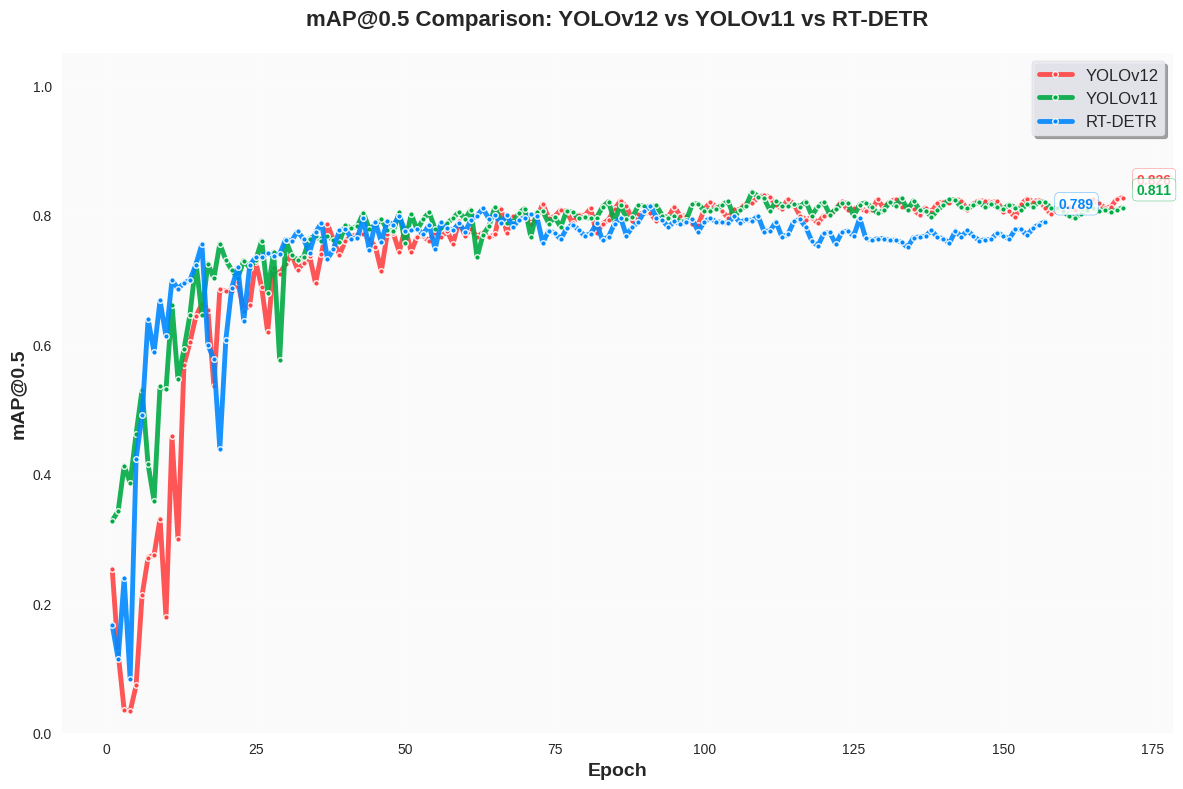


📈 MAP@0.5 SUMMARY:
YOLOv12    | Final: 0.8264 | Best: 0.8305 (Epoch 110)
YOLOv11    | Final: 0.8108 | Best: 0.8356 (Epoch 108)
RT-DETR    | Final: 0.7891 | Best: 0.8141 (Epoch 91)

2️⃣ Creating mAP@0.5:0.95 plot...
📊 mAP@0.5:0.95 plot saved to: individual_metrics_plots/map_0.5_0.95_comparison.png


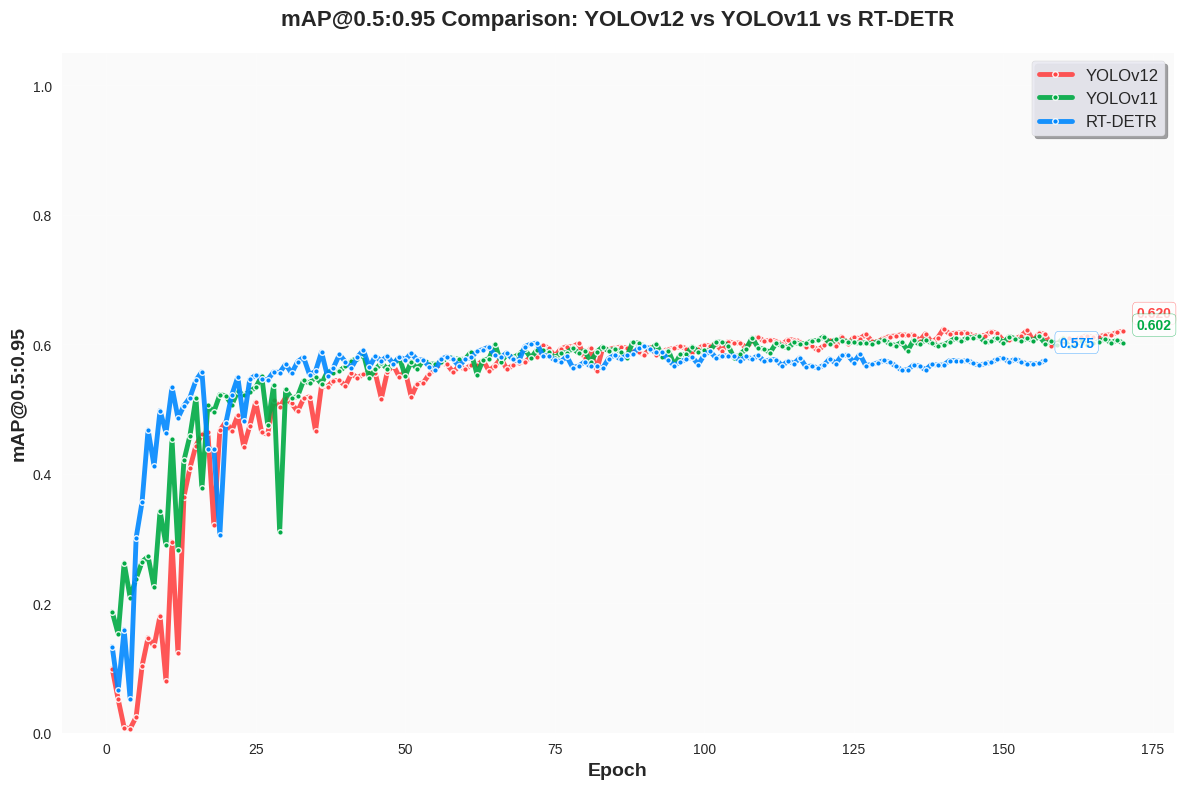


📈 MAP@0.5:0.95 SUMMARY:
YOLOv12    | Final: 0.6200 | Best: 0.6234 (Epoch 140)
YOLOv11    | Final: 0.6019 | Best: 0.6128 (Epoch 156)
RT-DETR    | Final: 0.5749 | Best: 0.6017 (Epoch 72)

3️⃣ Creating F1-Score plot...
📊 F1-Score plot saved to: individual_metrics_plots/f1_score_comparison.png


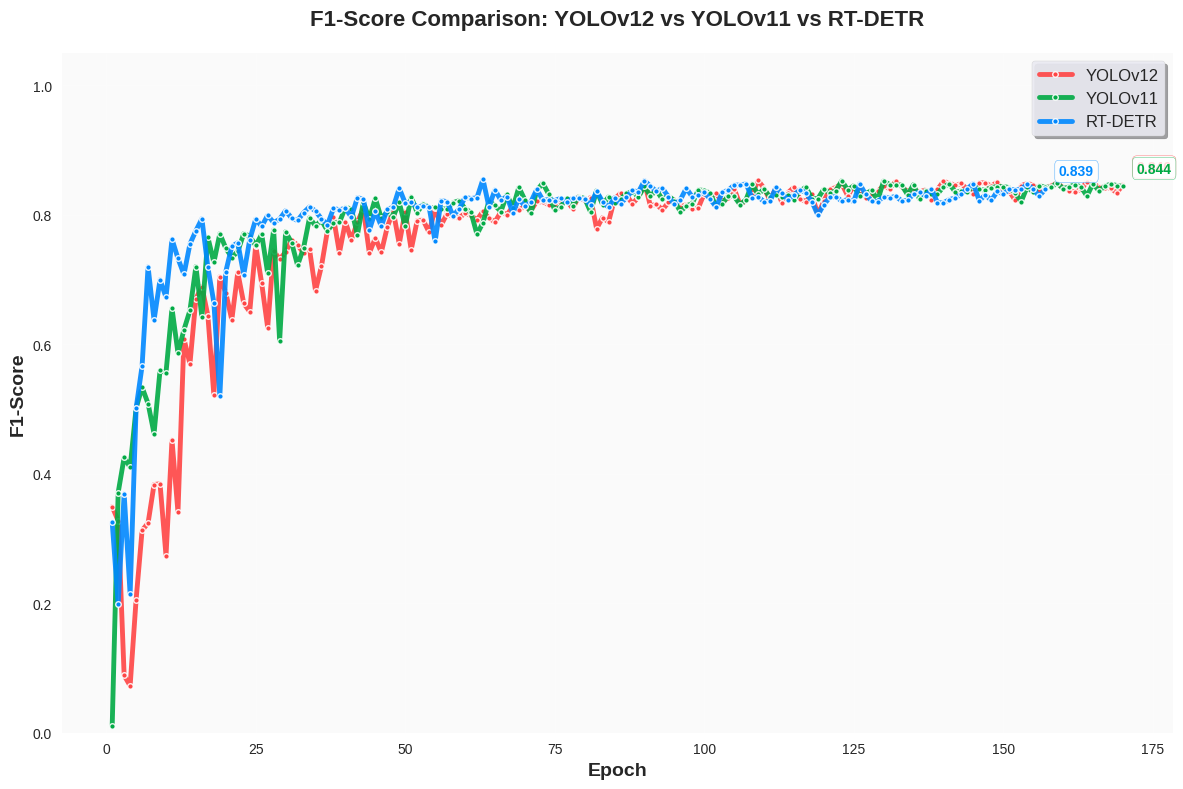


📈 F1-SCORE SUMMARY:
YOLOv12    | Final: 0.8460 | Best: 0.8529 (Epoch 109)
YOLOv11    | Final: 0.8436 | Best: 0.8524 (Epoch 123)
RT-DETR    | Final: 0.8390 | Best: 0.8546 (Epoch 63)

4️⃣ Creating Accuracy plot...
📊 Accuracy plot saved to: individual_metrics_plots/accuracy_comparison.png


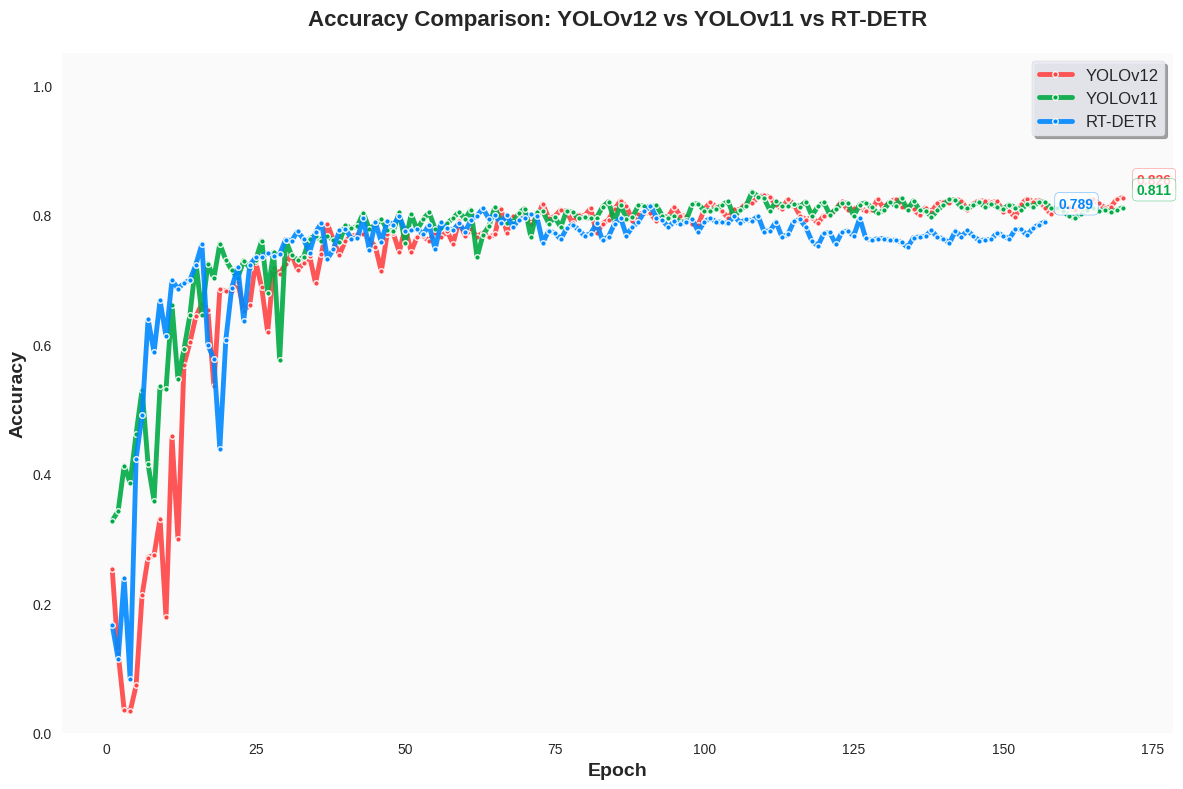


📈 ACCURACY SUMMARY:
YOLOv12    | Final: 0.8264 | Best: 0.8305 (Epoch 110)
YOLOv11    | Final: 0.8108 | Best: 0.8356 (Epoch 108)
RT-DETR    | Final: 0.7891 | Best: 0.8141 (Epoch 91)

5️⃣ Creating Precision plot...
📊 Precision plot saved to: individual_metrics_plots/precision_comparison.png


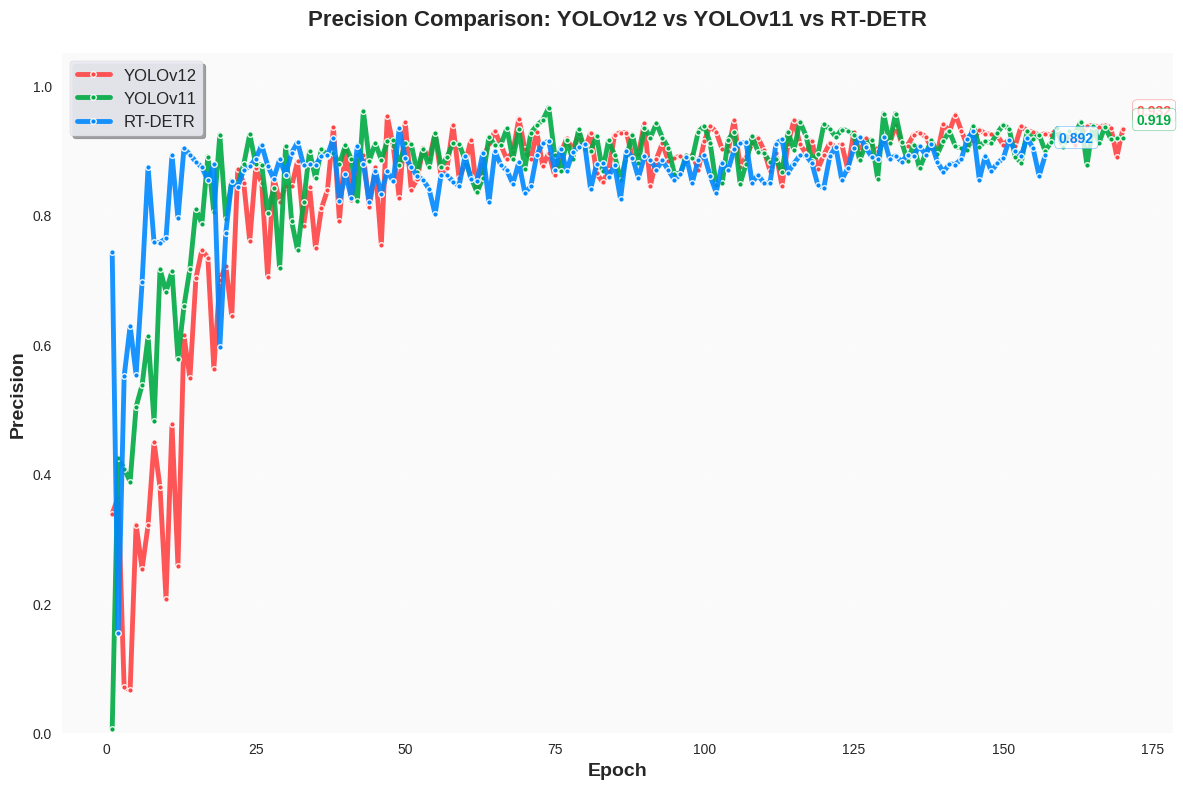


📈 PRECISION SUMMARY:
YOLOv12    | Final: 0.9324 | Best: 0.9547 (Epoch 142)
YOLOv11    | Final: 0.9191 | Best: 0.9654 (Epoch 74)
RT-DETR    | Final: 0.8915 | Best: 0.9333 (Epoch 49)

6️⃣ Creating Box Loss plot...
📊 Box Loss plot saved to: individual_metrics_plots/box loss_comparison.png


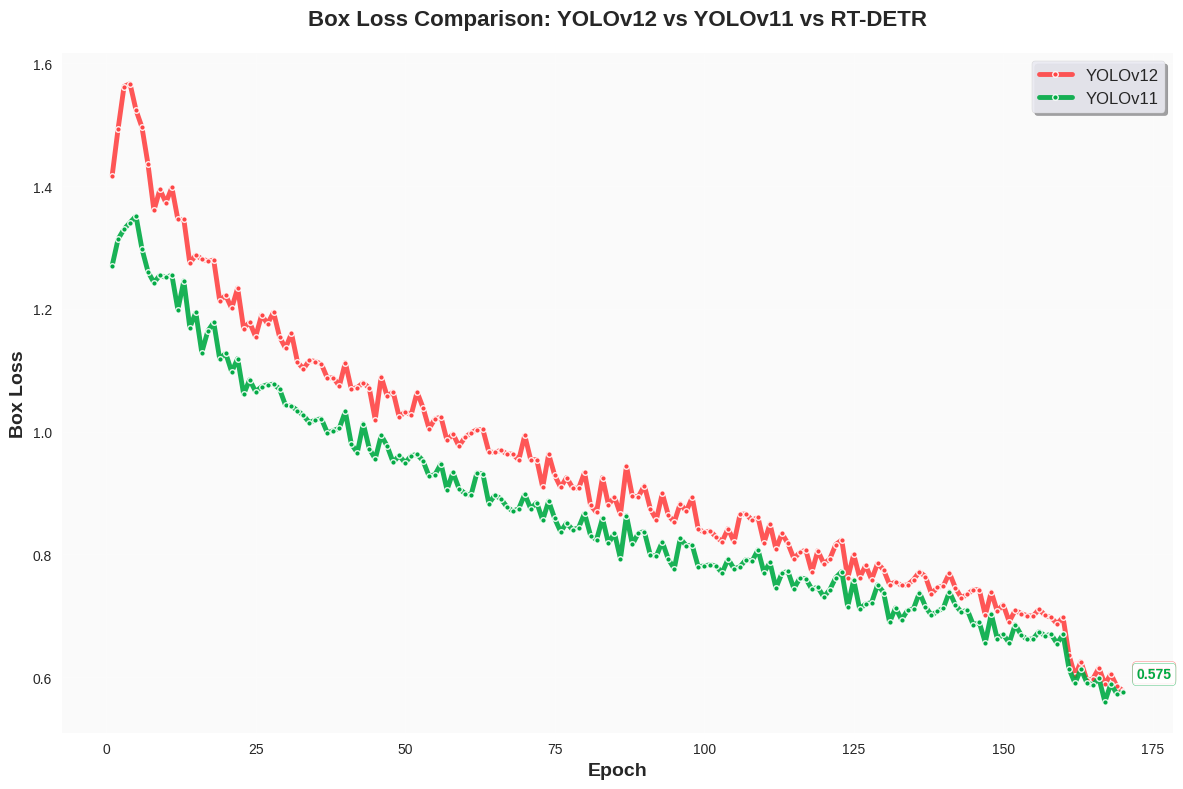


📈 BOX LOSS SUMMARY:
YOLOv12    | Final: 0.5780 | Best: 1.5668 (Epoch 4)
YOLOv11    | Final: 0.5752 | Best: 1.3511 (Epoch 5)

✅ All individual plots created!
📁 Plots saved to: individual_metrics_plots

🎉 INDIVIDUAL METRICS COMPARISON COMPLETE!
📊 Generated 6 separate plots:
   1️⃣ mAP@0.5 Comparison
   2️⃣ mAP@0.5:0.95 Comparison
   3️⃣ F1-Score Comparison
   4️⃣ Accuracy Comparison
   5️⃣ Precision Comparison
   6️⃣ Box Loss Comparison

🚀 STEP 2: ANALYZING RESULTS
🔍 COMPREHENSIVE RESULTS ANALYSIS
📅 Analysis Date: 2025-07-19 12:55:06
📊 Models: RT-DETR, YOLOv11, YOLOv12

📊 MAP@0.5 ANALYSIS
🏆 PERFORMANCE RANKING:
--------------------------------------------------
🥇 1. YOLOv12    | Final: 0.8264 | Best: 0.8305
🥈 2. YOLOv11    | Final: 0.8108 | Best: 0.8356
🥉 3. RT-DETR    | Final: 0.7891 | Best: 0.8141

🎯 WINNER: YOLOv12
------------------------------
✅ YOLOv12 achieves 1.9% higher mAP@0.5 than YOLOv11

⚡ CONVERGENCE ANALYSIS:
----------------------------------------
🚀 Fastest Convergence:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

class ComprehensiveResultsAnalysis:
    def __init__(self, comparison_tool):
        """Initialize analysis with loaded comparison tool"""
        self.tool = comparison_tool
        self.models_data = comparison_tool.models_data
        self.analysis_results = {}

    def extract_metric_data(self, model_name, metric_key):
        """Extract metric data for a specific model"""
        if model_name not in self.models_data:
            return None

        df = self.models_data[model_name]['dataframe']

        # Find metric column
        metric_col = self.tool.find_metric_column(df, metric_key)

        if metric_col:
            return df[metric_col].values
        elif metric_key == 'f1_score':
            return self.tool.calculate_f1_score(df)
        elif metric_key == 'accuracy':
            return self.tool.calculate_accuracy(df)

        return None

    def calculate_convergence_metrics(self, data, threshold_percent=95):
        """Calculate convergence metrics for a data series"""
        if data is None or len(data) == 0:
            return None

        final_value = data[-1]
        target_value = final_value * (threshold_percent / 100)

        # Find convergence epoch (when it reaches threshold% of final value)
        convergence_epochs = np.where(data >= target_value)[0]
        convergence_epoch = convergence_epochs[0] + 1 if len(convergence_epochs) > 0 else len(data)

        # Calculate stability (variance in last 20% of training)
        last_20_percent = int(len(data) * 0.8)
        stability = np.std(data[last_20_percent:]) if last_20_percent < len(data) else np.std(data)

        # Calculate improvement rate
        if len(data) > 1:
            improvement_rate = (data[-1] - data[0]) / len(data)
        else:
            improvement_rate = 0

        return {
            'final_value': final_value,
            'max_value': np.max(data),
            'convergence_epoch': convergence_epoch,
            'stability': stability,
            'improvement_rate': improvement_rate,
            'total_epochs': len(data)
        }

    def analyze_single_metric(self, metric_key, metric_name):
        """Comprehensive analysis of a single metric"""
        print(f"\n{'='*80}")
        print(f"📊 {metric_name.upper()} ANALYSIS")
        print(f"{'='*80}")

        metric_analysis = {}

        # Extract data for all models
        for model_name in ['YOLOv12', 'YOLOv11', 'RT-DETR']:
            if model_name in self.models_data:
                data = self.extract_metric_data(model_name, metric_key)
                if data is not None:
                    if hasattr(data, 'values'):
                        data = data.values
                    metric_analysis[model_name] = self.calculate_convergence_metrics(data)

        if not metric_analysis:
            print(f"❌ No data available for {metric_name}")
            return None

        # Performance Ranking
        print(f"🏆 PERFORMANCE RANKING:")
        print(f"{'-'*50}")

        # Sort by final value (descending for performance metrics, ascending for loss)
        is_loss_metric = 'loss' in metric_key.lower()
        sorted_models = sorted(metric_analysis.items(),
                             key=lambda x: x[1]['final_value'],
                             reverse=not is_loss_metric)

        for rank, (model, metrics) in enumerate(sorted_models, 1):
            medal = "🥇" if rank == 1 else "🥈" if rank == 2 else "🥉"
            print(f"{medal} {rank}. {model:10} | Final: {metrics['final_value']:.4f} | Best: {metrics['max_value']:.4f}")

        # Winner Analysis
        winner = sorted_models[0][0]
        winner_metrics = sorted_models[0][1]

        print(f"\n🎯 WINNER: {winner}")
        print(f"{'-'*30}")

        # Performance comparison
        if len(sorted_models) > 1:
            runner_up = sorted_models[1][0]
            runner_up_metrics = sorted_models[1][1]

            if is_loss_metric:
                improvement = ((runner_up_metrics['final_value'] - winner_metrics['final_value']) / runner_up_metrics['final_value']) * 100
                print(f"✅ {winner} achieves {improvement:.1f}% lower {metric_name} than {runner_up}")
            else:
                improvement = ((winner_metrics['final_value'] - runner_up_metrics['final_value']) / runner_up_metrics['final_value']) * 100
                print(f"✅ {winner} achieves {improvement:.1f}% higher {metric_name} than {runner_up}")

        # Convergence Analysis
        print(f"\n⚡ CONVERGENCE ANALYSIS:")
        print(f"{'-'*40}")

        convergence_ranking = sorted(metric_analysis.items(),
                                   key=lambda x: x[1]['convergence_epoch'])

        fastest_model = convergence_ranking[0][0]
        fastest_epochs = convergence_ranking[0][1]['convergence_epoch']

        print(f"🚀 Fastest Convergence: {fastest_model} (Epoch {fastest_epochs})")

        for model, metrics in convergence_ranking:
            epochs = metrics['convergence_epoch']
            efficiency = metrics['final_value'] / epochs if epochs > 0 else 0
            print(f"   {model:10} | Converged: Epoch {epochs:3d} | Efficiency: {efficiency:.6f}")

        # Stability Analysis
        print(f"\n📈 STABILITY ANALYSIS:")
        print(f"{'-'*40}")

        stability_ranking = sorted(metric_analysis.items(),
                                 key=lambda x: x[1]['stability'])

        most_stable = stability_ranking[0][0]

        print(f"🎯 Most Stable: {most_stable}")

        for model, metrics in stability_ranking:
            stability_score = "Excellent" if metrics['stability'] < 0.01 else "Good" if metrics['stability'] < 0.05 else "Fair"
            print(f"   {model:10} | Variance: {metrics['stability']:.6f} | Score: {stability_score}")

        # Key Insights
        print(f"\n💡 KEY INSIGHTS:")
        print(f"{'-'*30}")

        # Best overall performer
        if winner == fastest_model and winner == most_stable:
            print(f"⭐ {winner} is the clear winner - best performance, fastest convergence, and most stable")
        elif winner == fastest_model:
            print(f"🚀 {winner} combines best performance with fastest convergence")
        elif winner == most_stable:
            print(f"🎯 {winner} offers best performance with highest stability")
        else:
            print(f"🏆 {winner} has best final performance")
            print(f"⚡ {fastest_model} converges fastest")
            print(f"📊 {most_stable} is most stable")

        # Performance gaps
        if len(sorted_models) >= 2:
            gap = abs(sorted_models[0][1]['final_value'] - sorted_models[1][1]['final_value'])
            if gap < 0.01:
                print(f"📏 Performance gap is minimal ({gap:.4f}) - models are very competitive")
            elif gap < 0.05:
                print(f"📏 Moderate performance gap ({gap:.4f}) - clear but not decisive advantage")
            else:
                print(f"📏 Significant performance gap ({gap:.4f}) - clear winner")

        self.analysis_results[metric_key] = {
            'winner': winner,
            'fastest_convergence': fastest_model,
            'most_stable': most_stable,
            'metrics': metric_analysis,
            'ranking': sorted_models
        }

        return metric_analysis

    def generate_overall_comparison(self):
        """Generate overall comparison across all metrics"""
        print(f"\n{'='*80}")
        print(f"🎯 OVERALL COMPARISON SUMMARY")
        print(f"{'='*80}")

        # Count wins for each model
        model_scores = {'YOLOv12': 0, 'YOLOv11': 0, 'RT-DETR': 0}
        metric_winners = {}

        performance_metrics = ['mAP50', 'mAP50-95', 'f1_score', 'accuracy', 'precision']
        loss_metrics = ['box_loss']

        print(f"📊 METRIC-BY-METRIC WINNERS:")
        print(f"{'-'*50}")

        for metric_key, analysis in self.analysis_results.items():
            winner = analysis['winner']
            metric_winners[metric_key] = winner
            if winner in model_scores:
                model_scores[winner] += 1

            metric_name = metric_key.replace('_', ' ').title()
            print(f"🏆 {metric_name:15} | Winner: {winner}")

        # Overall champion
        print(f"\n🏆 OVERALL CHAMPION:")
        print(f"{'-'*30}")

        champion = max(model_scores.items(), key=lambda x: x[1])

        print(f"👑 {champion[0]} wins {champion[1]}/{len(self.analysis_results)} metrics")

        # Detailed scoring
        print(f"\n📈 DETAILED SCORING:")
        print(f"{'-'*40}")

        for model, score in sorted(model_scores.items(), key=lambda x: x[1], reverse=True):
            percentage = (score / len(self.analysis_results)) * 100
            stars = "⭐" * score + "☆" * (len(self.analysis_results) - score)
            print(f"{model:10} | {score}/{len(self.analysis_results)} wins | {percentage:5.1f}% | {stars}")

        # Strengths and weaknesses
        print(f"\n💪 STRENGTHS & WEAKNESSES:")
        print(f"{'-'*50}")

        for model in ['YOLOv12', 'YOLOv11', 'RT-DETR']:
            if model in [analysis['winner'] for analysis in self.analysis_results.values()]:
                wins = [metric for metric, analysis in self.analysis_results.items()
                       if analysis['winner'] == model]
                print(f"✅ {model:10} | Strong in: {', '.join(wins)}")
            else:
                print(f"❌ {model:10} | No metric wins")

        # Convergence comparison
        print(f"\n⚡ CONVERGENCE COMPARISON:")
        print(f"{'-'*40}")

        convergence_scores = {'YOLOv12': 0, 'YOLOv11': 0, 'RT-DETR': 0}
        for analysis in self.analysis_results.values():
            fastest = analysis['fastest_convergence']
            if fastest in convergence_scores:
                convergence_scores[fastest] += 1

        fastest_overall = max(convergence_scores.items(), key=lambda x: x[1])[0]
        print(f"🚀 Fastest Overall Convergence: {fastest_overall}")

        # Stability comparison
        stability_scores = {'YOLOv12': 0, 'YOLOv11': 0, 'RT-DETR': 0}
        for analysis in self.analysis_results.values():
            most_stable = analysis['most_stable']
            if most_stable in stability_scores:
                stability_scores[most_stable] += 1

        most_stable_overall = max(stability_scores.items(), key=lambda x: x[1])[0]
        print(f"🎯 Most Stable Overall: {most_stable_overall}")

        return {
            'champion': champion[0],
            'metric_winners': metric_winners,
            'model_scores': model_scores,
            'fastest_convergence': fastest_overall,
            'most_stable': most_stable_overall
        }

    def generate_recommendations(self):
        """Generate practical recommendations based on analysis"""
        print(f"\n{'='*80}")
        print(f"💡 PRACTICAL RECOMMENDATIONS")
        print(f"{'='*80}")

        overall_results = self.generate_overall_comparison()
        champion = overall_results['champion']

        print(f"🎯 FOR FISH DISEASE DETECTION:")
        print(f"{'-'*50}")

        # Primary recommendation
        print(f"🥇 PRIMARY RECOMMENDATION: {champion}")

        # Detailed reasoning
        champion_wins = overall_results['model_scores'][champion]
        total_metrics = len(self.analysis_results)

        if champion_wins >= total_metrics * 0.6:
            print(f"   ✅ Clear winner with {champion_wins}/{total_metrics} metric victories")
            print(f"   ✅ Demonstrates superior performance across multiple aspects")
        else:
            print(f"   ⚠️ Narrow victory with {champion_wins}/{total_metrics} wins")
            print(f"   💡 Consider specific use case requirements")

        # Use case specific recommendations
        print(f"\n🎯 USE CASE SPECIFIC RECOMMENDATIONS:")
        print(f"{'-'*60}")

        # Real-time applications
        fastest_model = overall_results['fastest_convergence']
        print(f"⚡ Real-time Applications: {fastest_model}")
        print(f"   Reason: Fastest convergence suggests efficient inference")

        # Production deployment
        most_stable = overall_results['most_stable']
        print(f"🏭 Production Deployment: {most_stable}")
        print(f"   Reason: Highest stability ensures consistent performance")

        # Research and development
        map50_winner = self.analysis_results.get('mAP50', {}).get('winner', 'N/A')
        print(f"🔬 Research & Development: {map50_winner}")
        print(f"   Reason: Best mAP@0.5 indicates superior detection accuracy")

        # Performance gaps analysis
        print(f"\n📊 PERFORMANCE GAPS:")
        print(f"{'-'*40}")

        for metric_key, analysis in self.analysis_results.items():
            ranking = analysis['ranking']
            if len(ranking) >= 2:
                winner_score = ranking[0][1]['final_value']
                runner_up_score = ranking[1][1]['final_value']

                if 'loss' in metric_key:
                    gap_percent = ((runner_up_score - winner_score) / runner_up_score) * 100
                else:
                    gap_percent = ((winner_score - runner_up_score) / runner_up_score) * 100

                metric_name = metric_key.replace('_', ' ').title()

                if gap_percent < 5:
                    status = "📏 Competitive"
                elif gap_percent < 15:
                    status = "📊 Clear advantage"
                else:
                    status = "🎯 Dominant"

                print(f"{metric_name:15} | Gap: {gap_percent:5.1f}% | {status}")

        # Final verdict
        print(f"\n🎯 FINAL VERDICT:")
        print(f"{'-'*30}")

        if champion_wins >= total_metrics * 0.8:
            print(f"🏆 {champion} is the CLEAR WINNER")
            print(f"   Dominates in {champion_wins}/{total_metrics} metrics")
            print(f"   Recommended for all fish disease detection tasks")
        elif champion_wins >= total_metrics * 0.6:
            print(f"🥇 {champion} is the PREFERRED CHOICE")
            print(f"   Strong performance in {champion_wins}/{total_metrics} metrics")
            print(f"   Best overall balance of accuracy and efficiency")
        else:
            print(f"⚖️ CLOSE COMPETITION between models")
            print(f"   Consider specific requirements:")
            print(f"   • Accuracy priority → {map50_winner}")
            print(f"   • Speed priority → {fastest_model}")
            print(f"   • Stability priority → {most_stable}")

    def run_complete_analysis(self):
        """Run complete analysis of all metrics"""
        print(f"🔍 COMPREHENSIVE RESULTS ANALYSIS")
        print(f"📅 Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
        print(f"📊 Models: {', '.join(self.models_data.keys())}")

        # Define metrics to analyze
        metrics = [
            ('mAP50', 'mAP@0.5'),
            ('mAP50-95', 'mAP@0.5:0.95'),
            ('f1_score', 'F1-Score'),
            ('accuracy', 'Accuracy'),
            ('precision', 'Precision'),
            ('box_loss', 'Box Loss')
        ]

        # Analyze each metric
        for metric_key, metric_name in metrics:
            self.analyze_single_metric(metric_key, metric_name)

        # Generate overall comparison
        overall_results = self.generate_overall_comparison()

        # Generate recommendations
        self.generate_recommendations()

        return self.analysis_results, overall_results

def analyze_comparison_results(comparison_tool):
    """Main function to analyze comparison results"""

    if not comparison_tool or not comparison_tool.models_data:
        print("❌ No comparison data available. Please run the comparison tool first.")
        return None

    # Create analysis instance
    analyzer = ComprehensiveResultsAnalysis(comparison_tool)

    # Run complete analysis
    analysis_results, overall_results = analyzer.run_complete_analysis()

    return analyzer, analysis_results, overall_results

# Integration with previous comparison tool
def run_full_comparison_and_analysis():
    """Run both comparison and analysis"""

    # Import and run the comparison tool
    from __main__ import run_individual_metrics_comparison

    print("🚀 STEP 1: LOADING COMPARISON DATA")
    print("="*60)

    # Run comparison tool
    comparison_tool = run_individual_metrics_comparison()

    if comparison_tool and comparison_tool.models_data:
        print(f"\n🚀 STEP 2: ANALYZING RESULTS")
        print("="*60)

        # Run analysis
        analyzer, analysis_results, overall_results = analyze_comparison_results(comparison_tool)

        return analyzer, comparison_tool
    else:
        print("❌ Analysis cannot proceed without comparison data")
        return None, None

# Main execution
if __name__ == "__main__":
    analyzer, comparison_tool = run_full_comparison_and_analysis()

    if analyzer:
        print(f"\n🎉 ANALYSIS COMPLETE!")
        print(f"📋 Use 'analyzer' object for additional queries")
        print(f"📊 Use 'comparison_tool' for regenerating plots")